In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
results = []
path = "../data/evaluation_results"

for folder, language in [(f"{path}/gsm_dan", "Danish"), (f"{path}/gsm_eng", "English")]:
    for file_name in os.listdir(folder):
        file_path = os.path.join(folder, file_name)

        df = pd.read_csv(file_path)
        accuracy = round(df["correct"].mean(), 3)

        results.append(
            {
                "model": file_name.replace(".csv", ""),
                "language": language,
                "accuracy": accuracy,
            }
        )
df = pd.DataFrame(results)

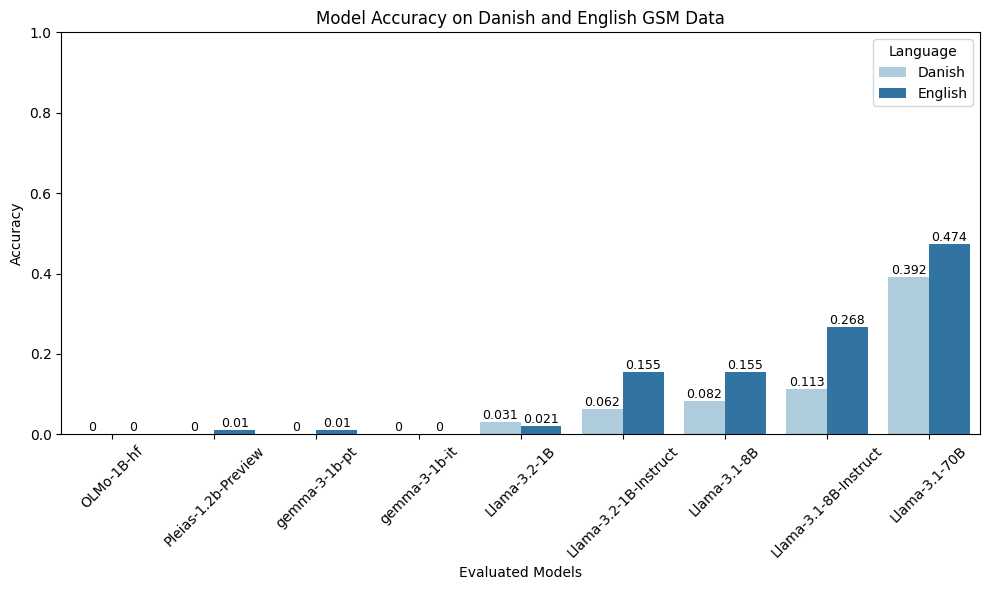

In [5]:
order_list = [
    "OLMo-1B-hf",
    "Pleias-1.2b-Preview",
    "gemma-3-1b-pt",
    "gemma-3-1b-it",
    "Llama-3.2-1B",
    "Llama-3.2-1B-Instruct",
    "Llama-3.1-8B",
    "Llama-3.1-8B-Instruct",
    "Llama-3.1-70B",
]

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    df, x="model", y="accuracy", hue="language", palette="Paired", order=order_list
)

for cont in ax.containers:
    ax.bar_label(cont, fontsize=9)

plt.title("Model Accuracy on Danish and English GSM Data")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

plt.xlabel("Evaluated Models")
plt.xticks(rotation=45)

plt.legend(title="Language")

plt.tight_layout()
plt.show()